# Module 6 Bond Prices and Yields





## Corporate Bond Features

* Callable Bonds: Can be repurchased by issuer before the maturity date
* Convertable Bonds: Can be exchanged for shares of firm's common stock
* Puttable Bonds: Gives the holder an option to retire or extend the bond
* Floating-rate Bonds: Have an adjustable coupon rate pegged to some benchmark

## Bond Market Innovations

* Inverse floaters: like floating-rate bonds, except coupon rate falls when the general interest rates _rise_
* Asset-backed bonds: use income from a specified group of assets to service the debt
* Catrastrophe bonds: final payment depends on whether there has been a catastrophe
* Indexed bonds: makes payments that are tied to a general price index or price of a commodity
* Treasury Inflation Protected Securities (TIPS): receive adjustments to principal based on past inflation rate; par value and coupon payments increase over time

## Bond Pricing

* $P_{B} = [ \sum^{T}_{t=1} \frac{C}{(1+r)^{t}} ] + \frac{Par Value}{(1 + r)^{T}} $

    - $P_{B}$ = Price of the Bond
    - $C_{t}$ = Interest or coupon payments (dollar amount)
    - $T$ = Number of (half-year) periods to maturity
    - $r$ = Semi-annual discount rate or semi-annual yield to maturity
    
    - ex: Price of a 30-year, 8% coupon bond (4% paid semiannually). Market rate of interest is 10% (5% per half year)

        - $Price = [ \sum^{60}_{t = 1} \frac{40}{1.05^{t}} ] + \frac{1000}{1.05^{60}}$
        - $Price = 810.71$

### Bond Prices and Yields

* Bond prices and yields are inversely related
* Bond price curve is convex
* The longer the maturity, the more sensitive the bond's price to changes in market interest rates



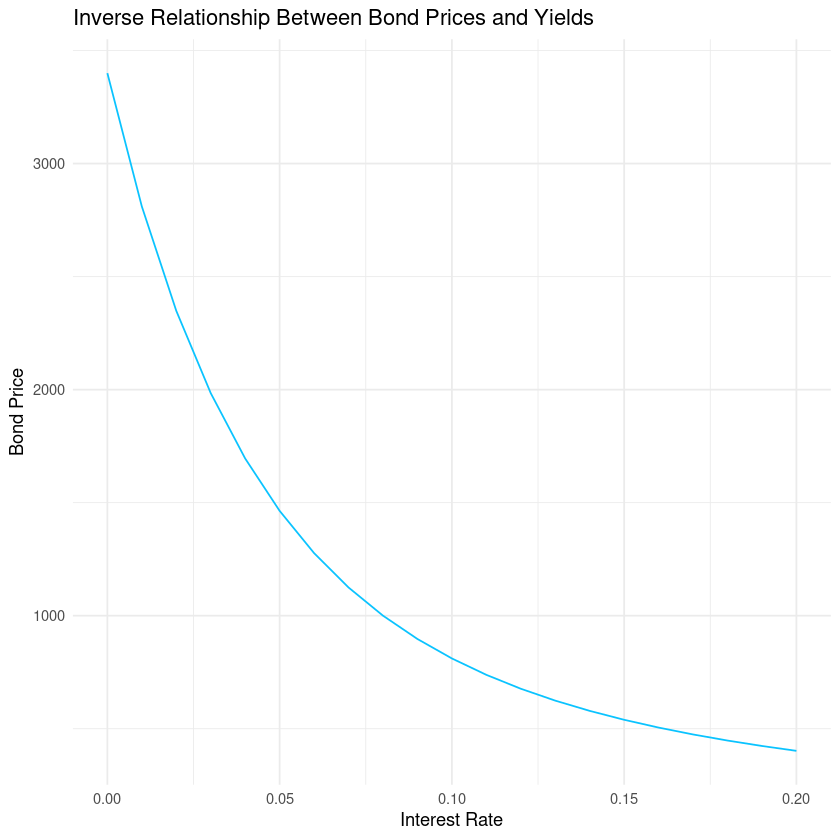

In [49]:
## plot inverse relationship b/w bond prices and yields
library(data.table)
suppressMessages(library(tidyverse))
bond_price <- function(T, C_rate_annual, r_annual, par = 1000){
    C_rate = C_rate_annual/2
    C = C_rate * par
    r = r_annual / 2
    rhs <- ( par / ((1 + r)^T) )
    price <- sapply(1:T, FUN = function(X) ( (C / ((1 + r)^X) ) )  )
    price <- sum(price) + rhs
    price
}
bond_price_yield_table <- data.table(interest_rate = seq(0,.20,by = .01))
bond_price_yield_table[,all_bond_price := sapply(interest_rate, FUN = function(x) bond_price(T = 60, C_rate_annual = .08, r = x, par = 1000) )]

ggplot(bond_price_yield_table) + aes(x = interest_rate, y = all_bond_price) + geom_line(size = 0.5, colour = "#0AC3FF") + labs( x = "Interest Rate", y = "Bond Price", title = "Inverse Relationship Between Bond Prices and Yields" ) + theme_minimal()


## Yield to Maturity

* Yield to Maturity (YTM) is the interest rate that makes the present value of the bond's payments equal to its current market price
* It's interpreted as a measure of the average rate of return that will be earned on a bond if it is bought now and held until maturity
* For YTM, use bond pricing equation and solve for r
* The market sets the price of the bond, given that price, what is the implied interest rate of the bond (r)

### Yield to Maturity Example:

* Suppose an 8% coupon, 30-year bond is selling for \$1,276.76. What is its implied rate of return (YTM)
* $1276.76 = [\sum^{60}_{t = 1} \frac{40}{(1+r)^{t}} ] + \frac{1000}{(1+r)^{60}} $
* Use linear optimization to solve for r, r = 3% for this example, annualized YTM = 6%

### YTM vs Current Yield

* YTM is the bond's internal rate of return, it may be interpreted as the compound rate of return over the life of the bond assuming all coupons are reinvested at that yield. It is a proxy for the average return over the life of the bond
* Current yield is the bond's annual coupon payment divided by its price

* Premium bonds: Coupon rate > Current yield > YTM
* Discount bonds: Coupon rate < Current yield < YTM

## Yield to Call for Bonds with Call Feature

* Some bonds are callable, can be repurchased by issuer before the maturity date
* A corporation may call on its bonds if rates decline, to pay down the higher interest debt with newer lower interest debt

## Realized Yield vs. YTM

* Realized returns are returns that actually occured, including the accumulated compounded value of all the coupons
* YTM equals the rate of return equals the realized yield if over the lifetime of the bond, all coupons are reinvested at the same rate as the YTM
    - In practice, this isn't always possible and reinvestment rates may differ from YTM
    


